In [11]:
# Cell 1: imports
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from model import build_mlp, MSELoss, SGD, grad_check

np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


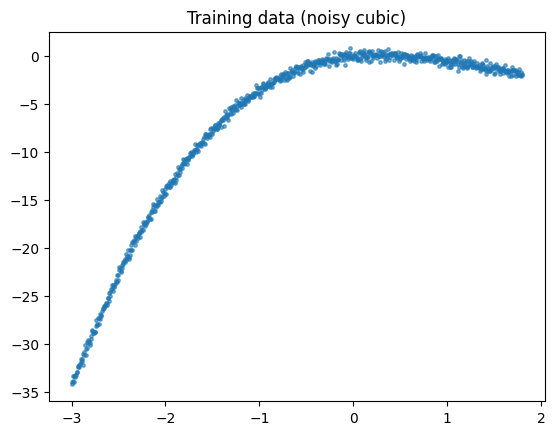

In [12]:
# Cell 2: data generation (univariate noisy cubic)
N = 1000
x = np.linspace(-3, 3, N).reshape(-1, 1)
noise = 0.3 * np.random.randn(N, 1)
y = (0.5 * x**3 - 2.0 * x**2 + 1.0 * x) + noise

# simple train / val split
split = int(0.8 * N)
X_train, y_train = x[:split], y[:split]
X_val, y_val = x[split:], y[split:]

plt.scatter(X_train, y_train, s=6, alpha=0.6)
plt.title('Training data (noisy cubic)')
plt.show()


In [13]:
# Cell 3: build network and gradient check
net = build_mlp(input_dim=1, hidden_units=[64, 64], output_dim=1, activation='relu')

print('Performing gradient check on a tiny batch...')
X_small = X_train[:8]
y_small = y_train[:8]
passed = grad_check(net, X_small, y_small)
print('Gradient check:', passed)


Performing gradient check on a tiny batch...
Grad check passed (sampled checks).
Gradient check: True


In [14]:
# Cell 4: training loop
optimizer = SGD(lr=1e-3, momentum=0.9)
loss_fn = MSELoss

epochs = 200
batch_size = 32
history = {'train_loss': [], 'val_loss': []}

for epoch in range(1, epochs+1):
    # shuffle
    perm = np.random.permutation(X_train.shape[0])
    X_shuf = X_train[perm]
    y_shuf = y_train[perm]

    epoch_losses = []
    for i in range(0, X_shuf.shape[0], batch_size):
        xb = X_shuf[i:i+batch_size]
        yb = y_shuf[i:i+batch_size]

        # forward
        y_pred = net.forward(xb)
        loss = loss_fn.forward(y_pred, yb)
        epoch_losses.append(loss)

        # backward
        grad = loss_fn.backward(y_pred, yb)
        net.backward(grad)

        # update
        optimizer.step(net.params_and_grads())

    # compute epoch train & val loss
    train_loss = np.mean(epoch_losses)
    val_pred = net.forward(X_val)
    val_loss = loss_fn.forward(val_pred, y_val)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)

    if epoch % 10 == 0 or epoch == 1:
        print(f'Epoch {epoch:3d} — train loss: {train_loss:.6f}, val loss: {val_loss:.6f}')


Epoch   1 — train loss: 63.956402, val loss: 0.728079
Epoch  10 — train loss: 0.416998, val loss: 0.410395
Epoch  20 — train loss: 0.142033, val loss: 0.292962
Epoch  30 — train loss: 0.100640, val loss: 0.506277
Epoch  40 — train loss: 0.103411, val loss: 0.681401
Epoch  50 — train loss: 0.092865, val loss: 0.740704
Epoch  60 — train loss: 0.094835, val loss: 0.810840
Epoch  70 — train loss: 0.091774, val loss: 0.815837
Epoch  80 — train loss: 0.087724, val loss: 0.891806
Epoch  90 — train loss: 0.094724, val loss: 0.945347
Epoch 100 — train loss: 0.090951, val loss: 0.936648
Epoch 110 — train loss: 0.090644, val loss: 0.980049
Epoch 120 — train loss: 0.088027, val loss: 0.985554
Epoch 130 — train loss: 0.103521, val loss: 0.980686
Epoch 140 — train loss: 0.091547, val loss: 0.970540
Epoch 150 — train loss: 0.119752, val loss: 1.032103
Epoch 160 — train loss: 0.098803, val loss: 1.042858
Epoch 170 — train loss: 0.118399, val loss: 1.052434
Epoch 180 — train loss: 0.092876, val loss: 1

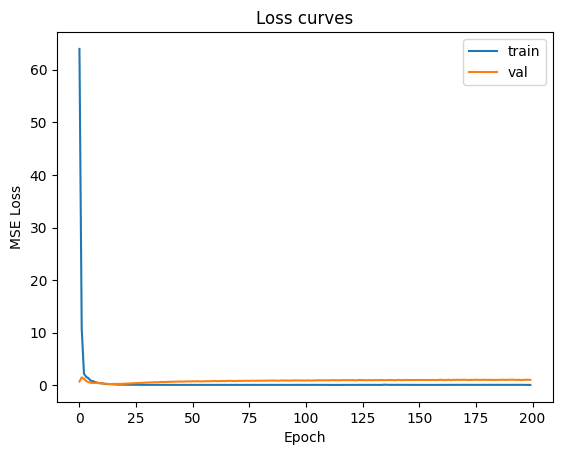

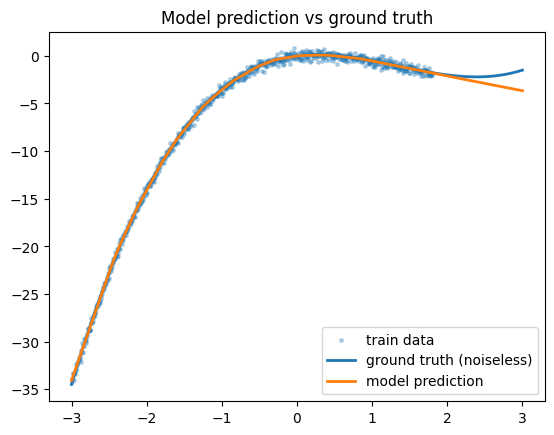

In [15]:
# Cell 5: plots
plt.figure()
plt.plot(history['train_loss'], label='train')
plt.plot(history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss curves')
plt.show()

# prediction vs ground truth
X_all = np.linspace(-3, 3, 300).reshape(-1, 1)
y_true_all = 0.5 * X_all**3 - 2.0 * X_all**2 + 1.0 * X_all
y_pred_all = net.forward(X_all)

plt.figure()
plt.scatter(X_train, y_train, s=6, alpha=0.3, label='train data')
plt.plot(X_all, y_true_all, label='ground truth (noiseless)', linewidth=2)
plt.plot(X_all, y_pred_all, label='model prediction', linewidth=2)
plt.legend()
plt.title('Model prediction vs ground truth')
plt.show()
